# Lab Assignment => 2

## Name : Yenumula Pavan Gopal Mourya
## Roll no : 202051208
## Branch : CSE ( Section 2)

# Task 1 :

## Part 1 :

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [2]:
# Computing the total patient attendance for all district
data=pd.read_csv('JK-Allopathic-Outpatient_attendance-May-2019.csv')
df=data.groupby('District').sum()
# Adding a new column which is the sum of columns the four groups
df['total']=df['No. of facilities by performance - 1 to 100']+df['No. of facilities by performance - 101 to 500']+df['No. of facilities by performance - 501 to 1000']+df['No. of facilities by performance - >1000']
print("The no.of patients in group 1 :",end=' :')
print(df['No. of facilities by performance - 1 to 100'].sum())

print("The no.of patients in group 2 :",end=' :')
print(df['No. of facilities by performance - 101 to 500'].sum())

print("The no.of patients in group 3 :",end=' :')
print(df['No. of facilities by performance - 501 to 1000'].sum())

print("The no.of patients in group 4 :",end=' :')
print(df['No. of facilities by performance - >1000'].sum())

print("The total no.of patients all together",end=' :')
print(df['total'].sum())

df.reset_index(inplace=True)

The no.of patients in group 1 : :1306
The no.of patients in group 2 : :1097
The no.of patients in group 3 : :10
The no.of patients in group 4 : :112
The total no.of patients all together :2525


In [16]:
data.head()

,District,Facility Type,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
0,Anantnag,DH,2,0,34828,41255,28402,0,0,0,2
1,Anantnag,CHC,5,0,10674,16209,5986,0,0,0,5
2,Anantnag,SC,154,10,42,300,2,137,7,0,0
3,Badgam,DH,1,0,23012,23012,23012,0,0,0,1
4,Badgam,CHC,9,0,9446,16828,4151,0,0,0,9


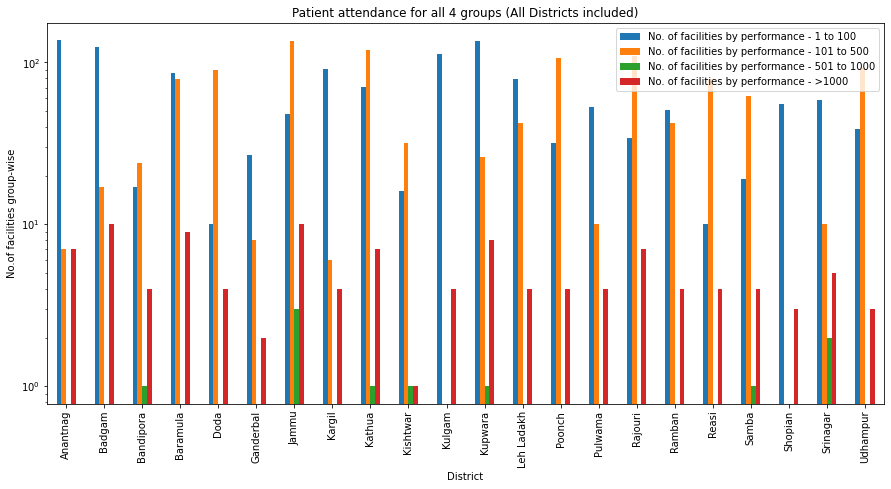

In [3]:
# Plotting graph for showing no.of patients for all the groups district-wise
data1=pd.DataFrame(data.groupby('District').sum())
df1=data1.loc[:,  data1.columns.isin(['No. of facilities by performance - 1 to 100','No. of facilities by performance - 101 to 500','No. of facilities by performance - 501 to 1000','No. of facilities by performance - >1000'])]
# df.reset_index(level=0, inplace=True) => If you include this then the District names will not appear .
# Instead you will seeing indices 
df1.plot(kind='bar',figsize=(15,7))
# How Did District appeared in bottom ? We haven't even specified the axes ?
# Remember we used group-by on the basis of Districts . So, By default it is taken as x-axis
plt.title("Patient attendance for all 4 groups (All Districts included)")
plt.xlabel("District") # No need for this we would be getting District by default
plt.ylabel("No.of facilities group-wise")
plt.yscale('log')

Text(0.5, 1.0, 'Total Patients in all districts')

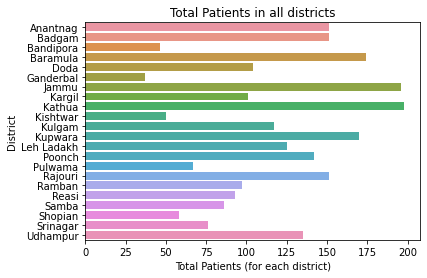

In [6]:
# Plotting no.of patients district wise
ax=sns.barplot(x='total',y='District',data=df)
ax.set_xlabel('Total Patients (for each district)')
plt.title('Total Patients in all districts')

## Part -2 :

Text(0.5, 1.0, 'Patients Total Attendance for all districts of all 3 Facility Types (ALl ranges included)')

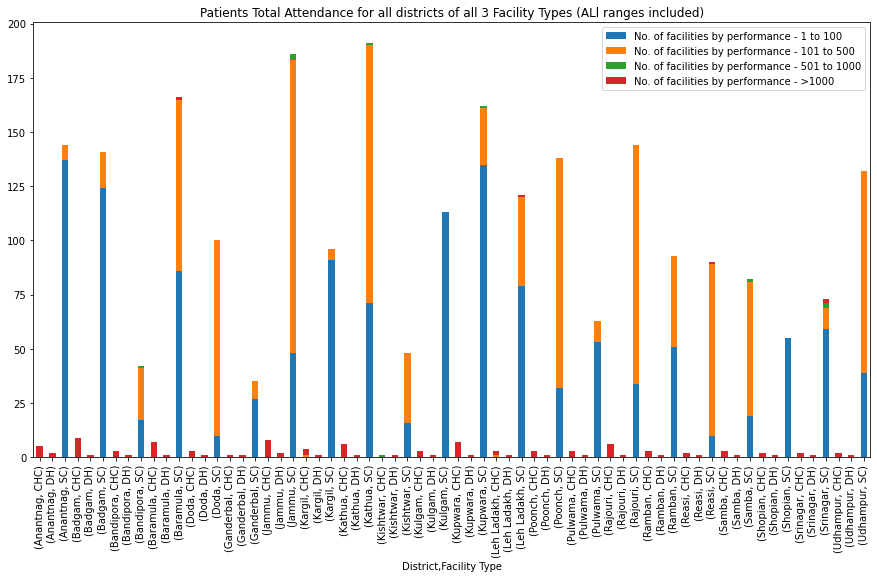

In [13]:
df2=data[['District','No. of facilities by performance - 1 to 100','No. of facilities by performance - 101 to 500','No. of facilities by performance - 501 to 1000','No. of facilities by performance - >1000']].groupby([data['District'],data['Facility Type']]).sum()
df2.plot(kind="bar",stacked=True,figsize=(15,8))
plt.title("Patients Total Attendance for all districts of all 3 Facility Types (ALl ranges included)")

Facility Type  CHC  DH   SC
District                   
Anantnag         5   2  144
Badgam           9   1  141
Bandipora        3   1   42
Baramula         7   1  166
Doda             3   1  100
Ganderbal        1   1   35
Jammu            8   2  186
Kargil           4   1   96
Kathua           6   1  191
Kishtwar         1   1   48
Kulgam           3   1  113
Kupwara          7   1  162
Leh Ladakh       3   1  121
Poonch           3   1  138
Pulwama          3   1   63
Rajouri          6   1  144
Ramban           3   1   93
Reasi            2   1   90
Samba            3   1   82
Shopian          2   1   55
Srinagar         2   1   73
Udhampur         2   1  132


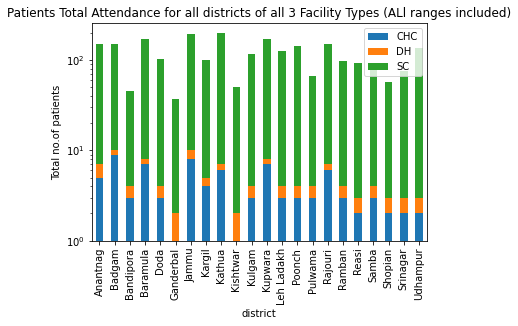

In [28]:
data['total']=data['No. of facilities by performance - 1 to 100']+data['No. of facilities by performance - 101 to 500']+data['No. of facilities by performance - 501 to 1000']+data['No. of facilities by performance - >1000']
df_n=data
df_y=df_n.groupby(['District','Facility Type']).agg(total_p=('total', 'sum'))
df_y.reset_index(inplace=True)
df_2=df_y[['District','total_p','Facility Type']]
df_2=df_2.pivot_table("total_p",index="District",columns="Facility Type",aggfunc='sum')
print(df_2)
df_2.plot(kind='bar', stacked=True)
plt.xlabel('district')
plt.ylabel('Total no.of patients')  
plt.title("Patients Total Attendance for all districts of all 3 Facility Types (ALl ranges included)")
plt.yscale('log')
plt.legend()

# Part-3

In [31]:
list=['District','Performance - Overall Average **','Facility Type']
df_3=data[list]
df_3=df_3.pivot_table("Performance - Overall Average **",index="District",columns="Facility Type",aggfunc='sum')
df_3=df_3.T[['Anantnag','Jammu','Poonch','Reasi','Udhampur']]
print(df_3)
df_3=df_3.T

District       Anantnag  Jammu  Poonch  Reasi  Udhampur
Facility Type                                          
CHC               10674   7343    7963   5614     10604
DH                34828  25335   19780   9236     29972
SC                   42    156     145    178       127


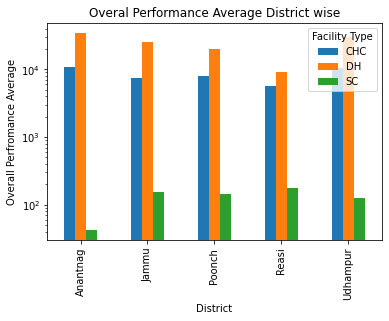

In [32]:
df_3.plot(kind='bar')
plt.title('Overal Performance Average District wise')
plt.ylabel('Overall Perfromance Average')
plt.yscale('log')
plt.legend(title='Facility Type')

# Part 4

Text(0.5, 1.0, 'Max Perfromace among the districts analyzing through dot plots')

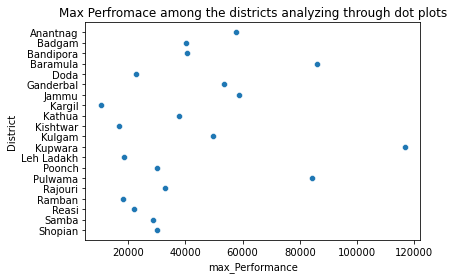

In [36]:
df_4=data.groupby(["District"]).agg(max_Performance=("Performance - Maximum", 'sum'))
df_4.reset_index(inplace=True)
df_4=df_4.iloc[:20]
pavan=sns.scatterplot(data=df_4, x="max_Performance", y="District")
plt.title("Max Perfromace among the districts analyzing through dot plots")

# Task - 2

## Part-1

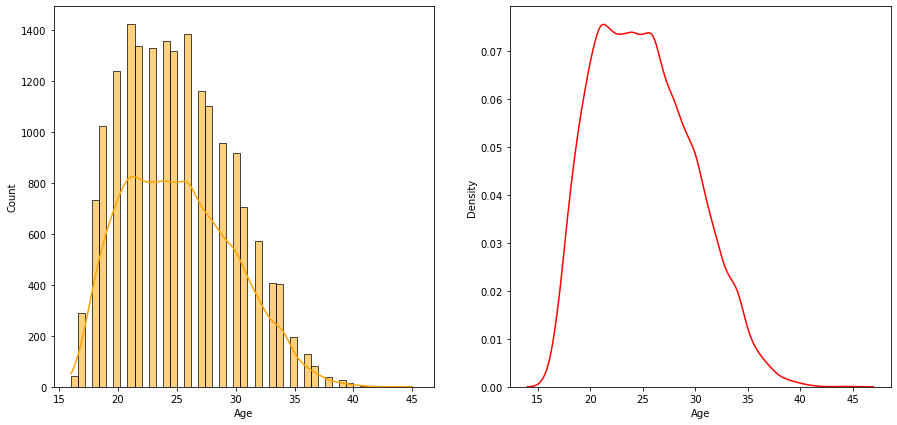

In [49]:
data_2=pd.read_csv('Fifa_player_football_data.csv')
fgr,axis = plt.subplots(1, 2, figsize=(15, 7))
pavan=sns.histplot(data=data_2, x="Age",binwidth=0.6,kde=True, color="orange", ax=axis[0])
pa1=sns.kdeplot(data=data_2, x="Age",color="red", ax=axis[1])

(array([1.063e+03, 3.687e+03, 4.030e+03, 3.868e+03, 2.977e+03, 1.689e+03,
        7.270e+02, 1.440e+02, 1.900e+01, 3.000e+00]),
 array([16. , 18.9, 21.8, 24.7, 27.6, 30.5, 33.4, 36.3, 39.2, 42.1, 45. ]),
 <BarContainer object of 10 artists>)

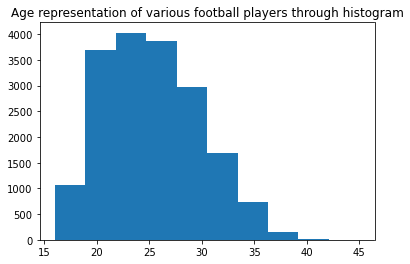

In [48]:
plt.title('Age representation of various football players through histogram')
plt.hist(data_2['Age'])

# Part 2

<AxesSubplot:title={'center':'Kernel Density Plot of Various football players of various age in FC Barcelona, Chelsea,Juventus and Real Madrid Clubs'}, xlabel='Age', ylabel='Density'>

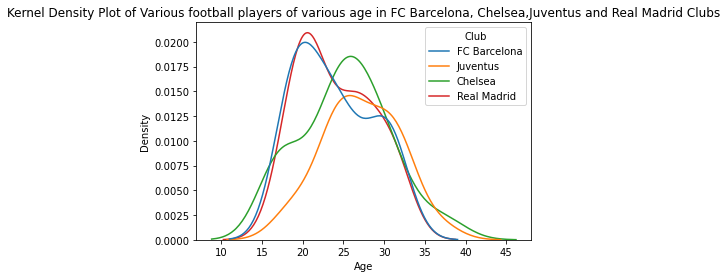

In [51]:
data_x=data_2[data_2['Club'].isin(['FC Barcelona','Chelsea','Juventus','Real Madrid'])]
data_x=data_x[["Age","Club"]]
data_x.reset_index(inplace=True)
plt.title("Kernel Density Plot of Various football players of various age in FC Barcelona, Chelsea,Juventus and Real Madrid Clubs")
sns.kdeplot(x="Age",data=data_x,color='olive',hue="Club")

Text(0.5, 1.0, 'Age of various Football players as Kernel Density plots for each of FC Barcelona, Chelsea,Juventus and Real Madrid Clubs')

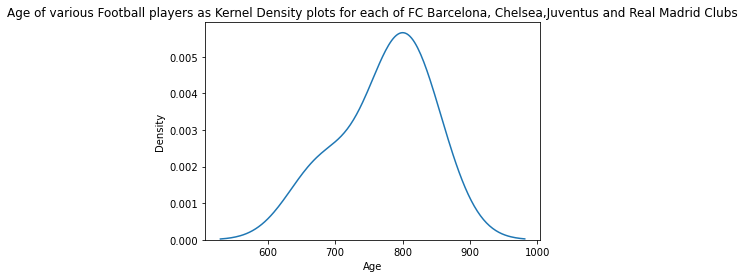

In [53]:
df_2_y=data_2.groupby(["Club"]).agg(Age=("Age", 'sum'))
df_2_y.reset_index(inplace=True)
df_2_y=df_2_y.loc[(df_2_y['Club'] == 'FC Barcelona') | (df_2_y['Club'] == 'Chelsea') | (df_2_y['Club'] == 'Juventus') | (df_2_y['Club']=='Real Madrid')]
pava=sns.kdeplot(data=df_2_y, x="Age")
plt.title("Age of various Football players as Kernel Density plots for each of FC Barcelona, Chelsea,Juventus and Real Madrid Clubs")

# part 3

Text(0.5, 1.0, 'Stacked Histogram')

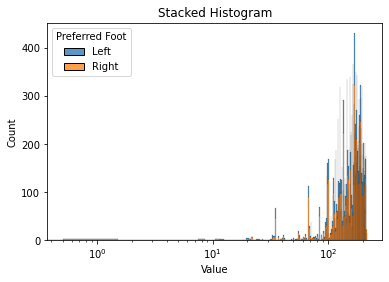

In [55]:
pa1=sns.histplot(data=data_2, x="Value",hue="Preferred Foot",multiple="stack")
pa1.set_xscale("log")
plt.title("Stacked Histogram")

# part 4

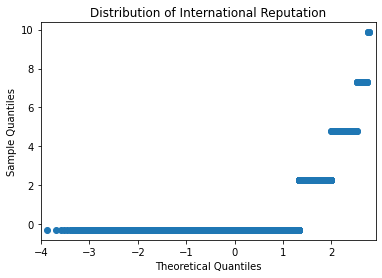

In [56]:
dt=(data_2["International Reputation"]-data_2["International Reputation"].mean())/data_2["International Reputation"].std()
qqplot(dt,line='s')
plt.title("Distribution of International Reputation")
plt.show()